## <font color="#7C220F">**Introduction:**</font>

For this project we will use a dataset called heart failure clinical_records dataset from kaggle web site.

This project aims to develop and evaluate a logistic regression model to predict the likelihood of death event by heart disease based on various risk factors.

### <font color="#7C220F">Description of Each Variable:</font>

- Age - The age of the patients
- Anaemia - Decrease of red blood cells or hemoglobin. 0 means that the person does not have anaemia, if 1 it does.
- Creatinine Phosphokinase - The level of the CPK enzyme in the blo. CPK normal range for adult males is 55-170 U/L and for adult females, it is 30-135 U/L.o
- Diabetes -If the patient has diabet. when the body has too much blood glucose, or blood sugar. less than 100 mg/dL (5.6 mmol/L) is considered normal.
- Ejection Fraction - Percentage of blood leaving the heart at each contractio normal ejection fraction is  55%-75%
- High Blood Pressure - If the patient has hypertensio. 0 means that the person does not have high_blood_pressure, if 1 it does.
- Platelets - Platelet(thrombocytes)s in the blood. A normal platelet count is between 150,000 and 400,000 platelets per microliter (mcL) of blood.
- Serum Creatinine - the level of serum creatinine in the bloo. 0.7 to 1.3 mg/dL (61.9 to 114.9 µmol/L) for men and 0.6 to 1.1 mg/dL (53 to 97.2 µmol/L) for women
- Serum Sodium - The level of serum sodium in the bloo. The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L)
- Sex - The gender of the patients, 0 for female, 1 for male.
- Smoking - if the patient smokes or not. 0 means that the person does not smoke, if 1 it smokes.
- Time - follow-up period
- Death Event - if the patient died during the follow-up period or not. 0 means heart failure is not the cause of the death, if 1 it is.

As all the columns are factors to the heart failure prediction we will use all the columns as a feature except Death_Event whcih is the target column in this project.

#
# <font color="#7C220F">**Project on Logistic Regression - Heart_Failure_Clinical_Records**</font>

### <font color="#7C220F">Importing Libraries</font>


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

### <font color="#7C220F">Data Collection</font>

In [ ]:
df=pd.read_csv("/content/Heart_Failure_Clinical_Records.csv")

## <font color="#7C220F">**1.  Data Preprocessing**</font>

Under this section we will perform data cleaning, feature selection, and normalization to prepare the dataset for model development.


In [ ]:
print("SHAPE:",    df.shape)
print("COLUMNS:",  df.columns)
print("HEAD:",     df.head())
print("DESCRIBE:", df.describe())

SHAPE: (5000, 13)
COLUMNS: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
HEAD:     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [ ]:
pd.DataFrame(df.isnull().sum(),columns=['NaN']).style.background_gradient(cmap='rainbow')

,NaN
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

From the above preprocessing we observe that the dataset contain 5000 rows and 13 columns, all data is clean and there is no missing value.

## <font color="#7C220F">**2. Exploratory Data Analysis (EDA)**</font>
Here we will figure out any pairwise association or variable distribution between each variables using different visualization tools and correlation analysis

<Axes: >

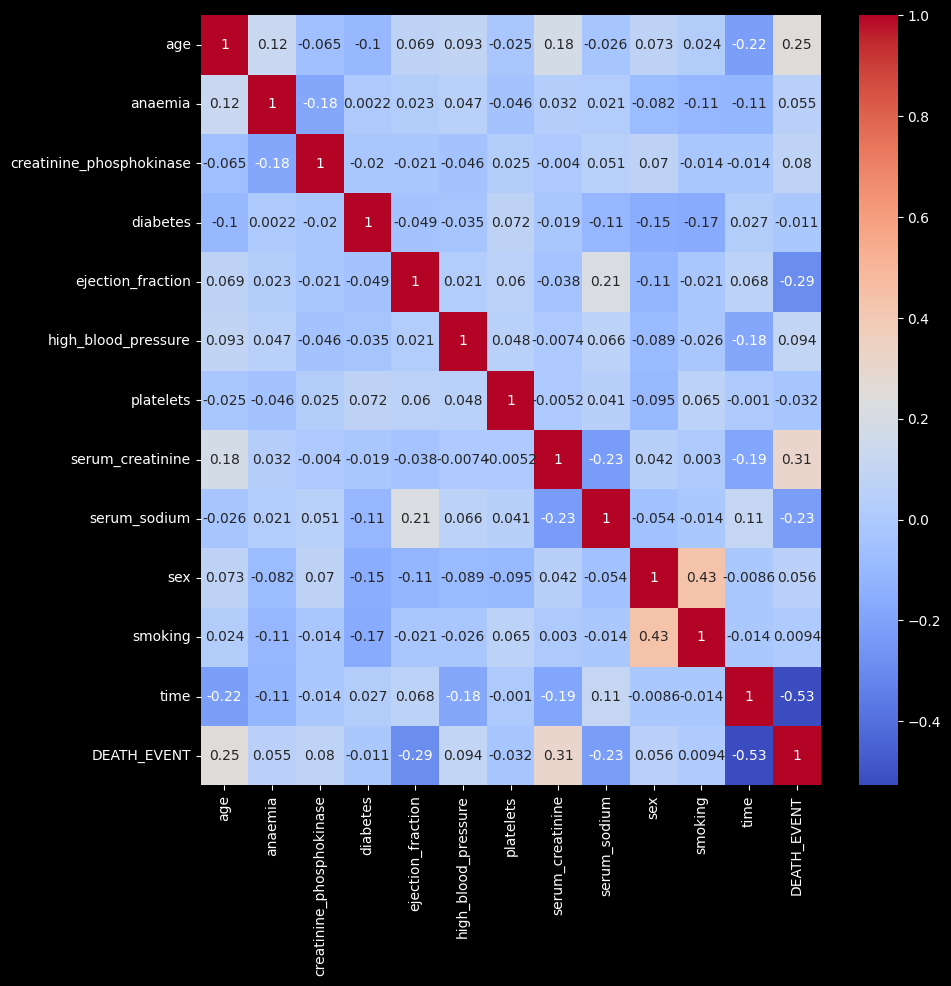

In [ ]:
#Heatmap(correlation Analysis)

plt.figure(figsize=(10,10))
cor=df.corr()
sns.heatmap(cor, annot=True,cmap='coolwarm')


####We observed from heatmap
   **Highly**

    +VE Correlation:-   Between DEATH_EVENT and serum creatinine & age.

    -VE Correlation:-   Between DEATH_EVENT and time, ejection fraction , serum sodium.

  **Medium**

    +VE Correlation:-   Between DEATH_EVENT and aneamia, high_blood_pressure & sex.

    -VE Correlation:-   Between DEATH_EVENT and diabets & platelets
  **Low**

    +VE Correlation:-   Between DEATH_EVENT and smoking

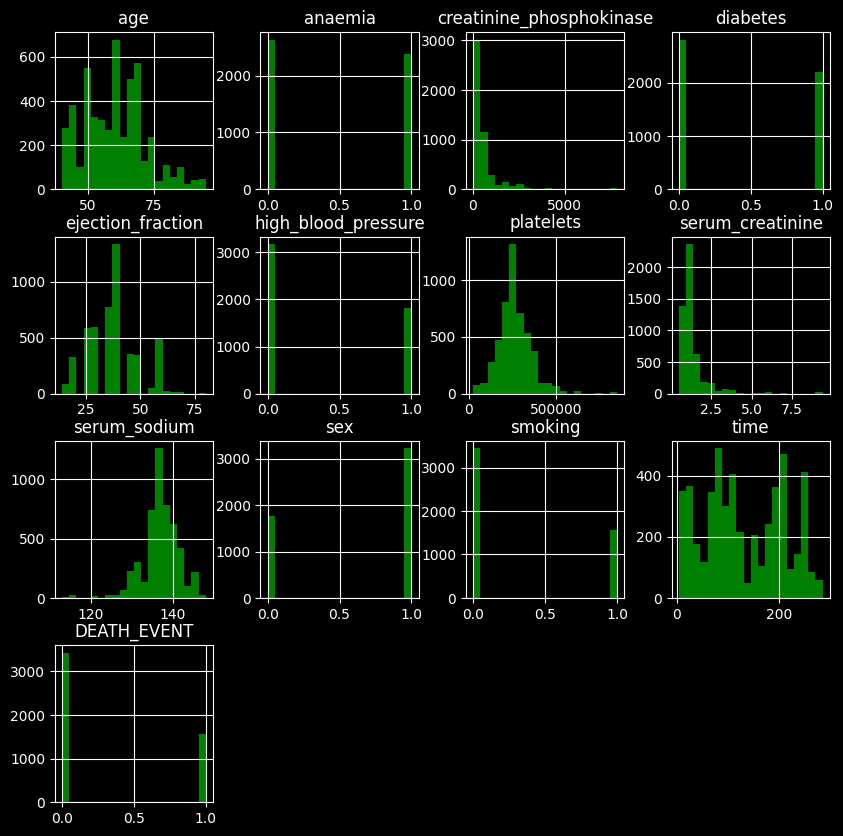

In [ ]:
# Distribution of All Variables
df.hist(bins=20, figsize=(10,10), color='green')
plt.show()

### <font color="#7C220F">Grouping the dataset</font>


In [ ]:
#We split our dataset into three categories to make it easier for analysis

target=["DEATH_EVENT"]
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

In [ ]:
for i,cat in enumerate(categorical_data):
    print(i, cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


In [ ]:
for i,cat in enumerate(continuous_data):
    print(i, cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


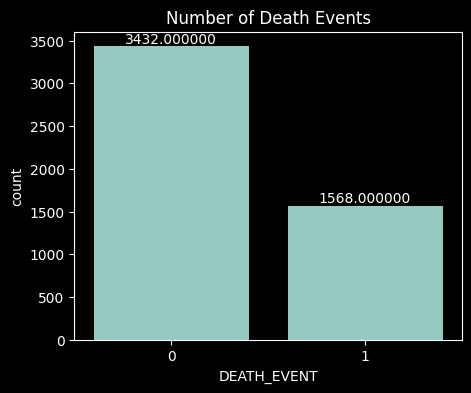

In [ ]:
# Target variable distribution

plt.figure(figsize=(5,4))
dc=sns.countplot(x="DEATH_EVENT", data=df)
for i in dc.patches:
    dc.annotate(format(i.get_height(), '0f'),
               (i.get_x() + i.get_width()/2.,i.get_height()),
                ha='center', va='center',
                xytext=(0,5),
                textcoords = 'offset points')

plt.title("Number of Death Events")
plt.show()

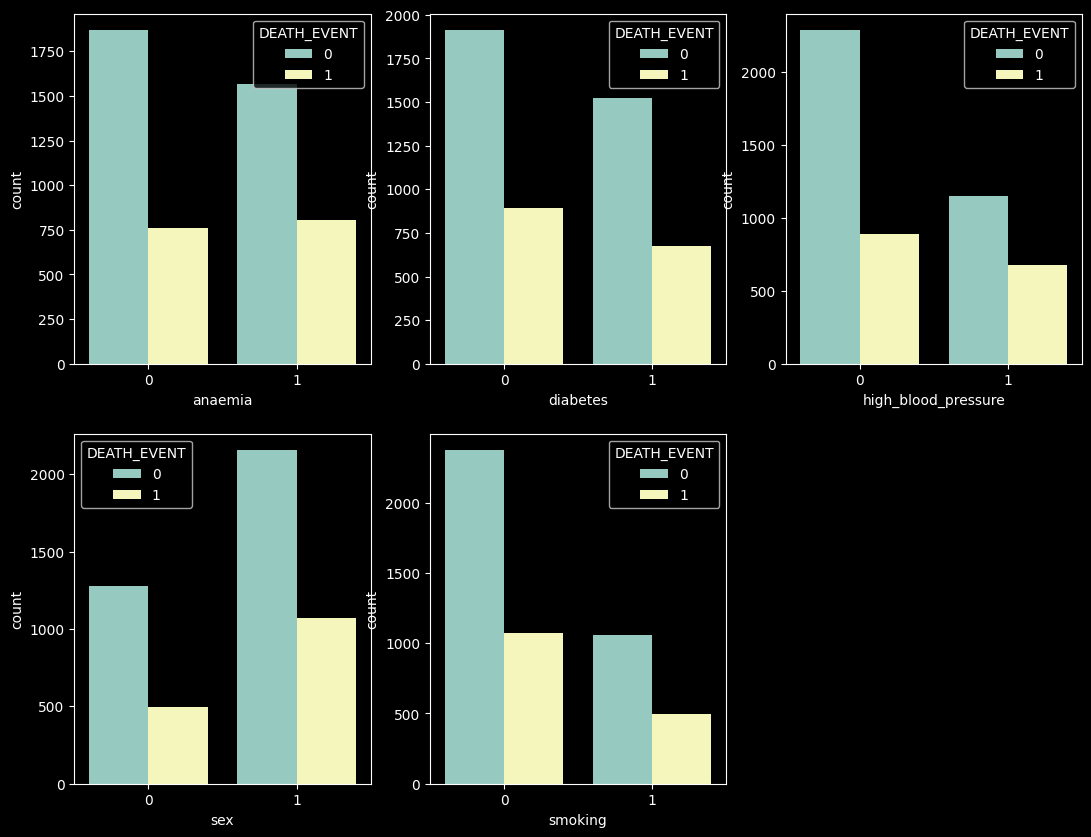

In [ ]:
# Plotting the impact of categorical variables on DEATH_EVENT
plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x= cat, hue = "DEATH_EVENT")
plt.show()

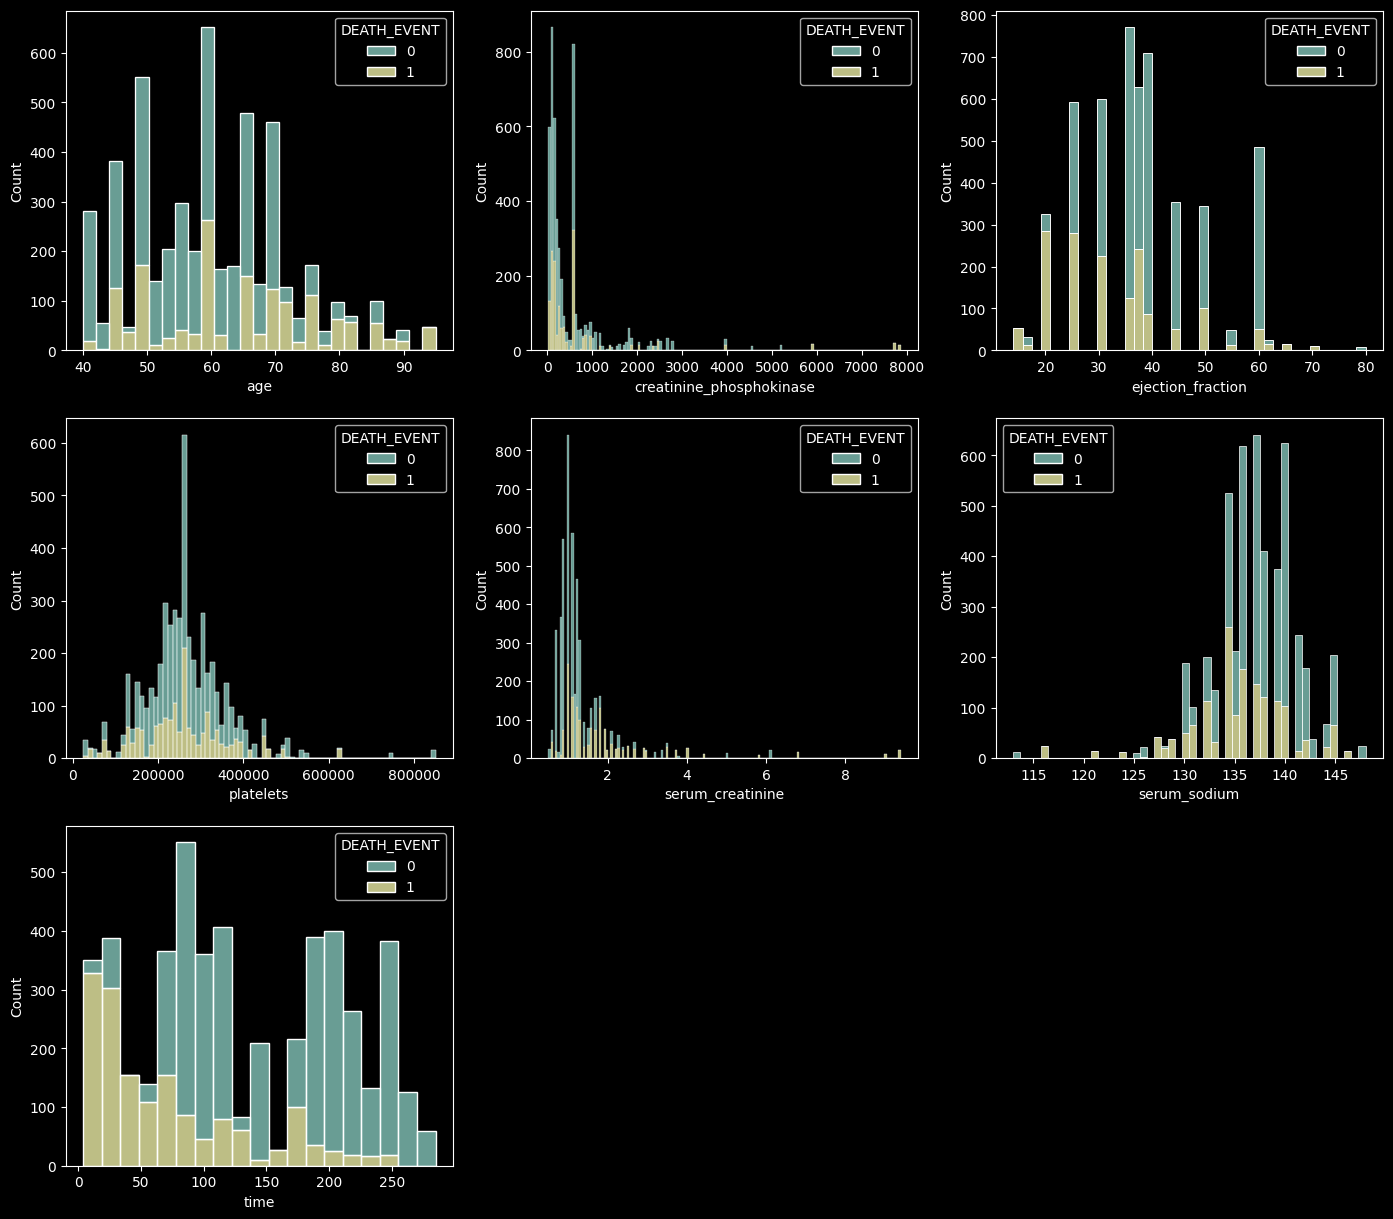

In [ ]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data = df, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

## <font color="#7C220F">**3. Data Modeling**</font>
    * Split the data in to a training set and test set with an 80-20 split.
    * Build a logistic regression model using tools like Python and libraries such as scikit-learn and NumPy to predict heart failure based on selected features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [ ]:
# Spliting feature and target
y=df["DEATH_EVENT"]
x=df.drop(["DEATH_EVENT"],axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

### <font color="#7C220F">Import Algorithms</font>

In [ ]:
# Importing Classification Algorithms

from sklearn.linear_model import LogisticRegression          #1
from sklearn.tree import DecisionTreeClassifier              #2
from sklearn.ensemble import RandomForestClassifier          #3

### <font color="#7C220F">Logistic Regression</font>

In [ ]:
# Creating Logistic Regression Model
LRM = LogisticRegression()
LRM.fit(xtrain, ytrain)
LRM_PRED = LRM.predict(xtest)

## <font color="#7C220F">**4. Evaluate the model**</font>
Assess the performance of the logistic regression model using metrics such as accuracy, precision, recall,f1-score and support.

In [ ]:
ypredict = LRM.predict(xtest)
LR_accu = accuracy_score(LRM_PRED, ytest)
print("Logistic Accuracy Score: ","{:.2f}%".format(100*LR_accu))

print("Confusion Matrix: \n", metrics.confusion_matrix(ytest, ypredict))
print("<Strong>Classification Report: <Strong> \n", metrics.classification_report(ytest, ypredict))

Logistic Accuracy Score:  83.87%
Confusion Matrix: 
 [[938  78]
 [164 320]]
<Strong>Classification Report: <Strong> 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      1016
           1       0.80      0.66      0.73       484

    accuracy                           0.84      1500
   macro avg       0.83      0.79      0.81      1500
weighted avg       0.84      0.84      0.83      1500



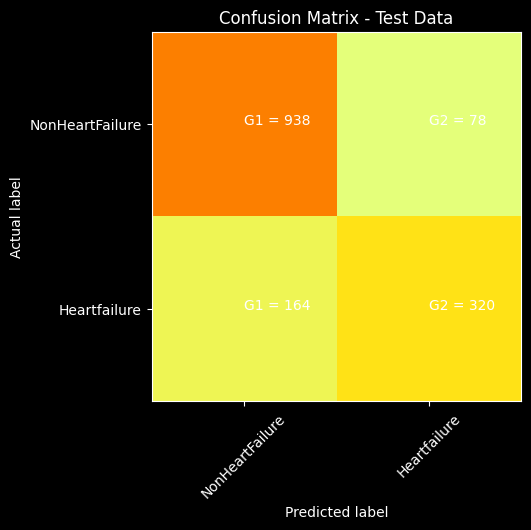

In [ ]:
cm = metrics.confusion_matrix(ytest, ypredict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['NonHeartFailure', 'Heartfailure']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]

for i in range(2):
    for j in range(2):

        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## <font color="#7C220F">**Comparison**</font>
Compare the results of the logistic regression model with other machine learning algorithms commonly used for heart disease prediction.

In [ ]:
#3 Decison Tree Classifier
DTCM = DecisionTreeClassifier(criterion="entropy", max_depth=2)
DTCM.fit(xtrain, ytrain)
DTCM_pred = DTCM.predict(xtest)

DTCM_accu = accuracy_score(DTCM_pred, ytest)
print("Decison Tree Classifier Accuracy Score: ","{:.2f}%".format(100*DTCM_accu))

Decison Tree Classifier Accuracy Score:  85.40%


In [ ]:
#5 Random Forest Classifier
RFM = RandomForestClassifier()
RFM.fit(xtrain, ytrain)
RFM_pred = RFM.predict(xtest)

RFM_accu = accuracy_score(RFM_pred, ytest)
print("Random Forest Classifier Accuracy Score: ","{:.2f}%".format(100*RFM_accu))

Random Forest Classifier Accuracy Score:  99.00%


1. **Logistic Accuracy Score: 84.00%**
2. **Decison Tree Classifier Accuracy Score: 85.40%**
5. **Random Forest Classifier Accuracy Score: 99.00%**

## <font color="#7C220F">**Deploment**</font>

Please check on the attached Jupyter file